In [187]:
import pandas as pd
import numpy as np

In [189]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

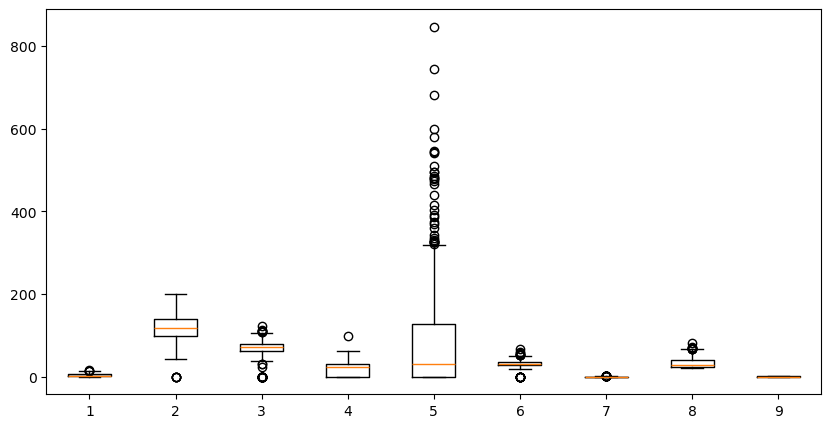

In [195]:
plt.figure(figsize=(10,5))
plt.boxplot(df)
plt.show()

In [197]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [199]:
Glucose_mean = df[df["Glucose"]!=0].Glucose.mean()
BloodPressure_mean = df[df["BloodPressure"]!=0].BloodPressure.mean()
SkinThickness_mean =df[df["SkinThickness"]!=0].SkinThickness.mean()
Insulin_mean =df[df["Insulin"]!=0].Insulin.mean()
BMI_mean =df[df["BMI"]!=0].BMI.mean()

In [201]:
df['Glucose'] = df['Glucose'].replace(0,Glucose_mean)
df['BloodPressure'] = df['BloodPressure'].replace(0,Glucose_mean)
df['SkinThickness'] = df['SkinThickness'].replace(0,Glucose_mean)
df['Insulin'] = df['Insulin'].replace(0,Glucose_mean)
df['BMI'] = df['BMI'].replace(0,Glucose_mean)


In [203]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,74.651089,56.503770,139.058397,33.735487,0.471876,33.240885,0.348958
std,3.369578,30.435949,15.877562,43.155332,86.691507,12.641918,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.265072,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,73.000000,35.000000,121.686763,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,82.000000,121.686763,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,121.686763,846.000000,121.686763,2.420000,81.000000,1.000000


In [205]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Dependent and independent Feature

In [208]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape ,X_test.shape

((576, 8), (192, 8))

### Scaling the Data

In [213]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [215]:
X_test_scaled

array([[ 0.6839137 , -0.78910477, -1.05180859, ...,  0.06594917,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.32328202,  0.05515501, ...,  0.21530279,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.45637423, -0.66111556, ..., -0.21518705,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.04272157, -0.14019151, ...,  0.03080715,
         0.77981801,  0.09377001],
       [-0.22446668, -1.45456583, -1.57273264, ..., -0.19761603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.52292034, -0.14019151, ..., -0.6544624 ,
        -0.77166568, -0.51505559]])

In [217]:
X_train_scaled.shape

(576, 8)

In [219]:
import pickle
with open('standardscalar.pkl','wb') as f:
    pickle.dump(scalar,f)

In [155]:
from sklearn.linear_model import LogisticRegression

In [225]:
classifier = LogisticRegression()

In [227]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [229]:
y_pred = classifier.predict(X_test_scaled)

In [231]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [233]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[103  30]
 [ 20  39]]
0.7395833333333334


In [235]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1','l2'),
             'C':np.logspace(-3,3,7),
             'solver':['newton-cg','lbfgs','liblinear']
             }

In [237]:
classifier = LogisticRegression()
clf = GridSearchCV(classifier,param_grid=parameters,cv=10,scoring='accuracy')

In [239]:
clf.fit(X_train_scaled,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2'),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [241]:
clf.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [243]:
classifier = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg')

In [245]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [249]:
y_pred = classifier.predict(X_test_scaled)

In [263]:
accuracy_score(y_pred,y_test)

0.75

In [253]:
confusion_matrix(y_pred,y_test)

array([[108,  33],
       [ 15,  36]], dtype=int64)

In [255]:
from sklearn.metrics import precision_score

In [267]:
precision_score(y_test,y_pred)

0.7058823529411765

In [273]:
from sklearn.metrics import classification_report

In [279]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       123
           1       0.71      0.52      0.60        69

    accuracy                           0.75       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



In [281]:
with open('classifier.pkl','wb') as f:
    pickle.dump(classifier,f)